In [11]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.parsing.preprocessing import preprocess_string, STOPWORDS
from tqdm import tqdm
import pandas as pd
import numpy as np
from gensim.models.phrases import Phrases, Phraser
from gensim.corpora import Dictionary
from gensim.models import LdaModel

In [12]:
df = pd.read_csv('C:/Users/leesa/Desktop/df_train_full_info.csv')

In [13]:
def clean_tokenize_text(tweet_df):
    tweet_df['tweet_text'] = tweet_df['tweet_text'].astype(str)
    lst = []
    for i in tweet_df.tweet_text:
        token_lst = preprocess_string(i)
        stop_lst = [k for k in token_lst if k not in STOPWORDS]
        lst.append(stop_lst)
    tweet_df['tokens'] = lst

    return tweet_df

In [14]:
def append_bigrams(tweet_df):

    phrase_model = Phrases(tweet_df.tokens, min_count = 20)
    frozen_model = Phraser(phrase_model)
    tweet_df['tokens'] = [frozen_model[i] for i in tweet_df['tokens']]

    return tweet_df

In [15]:
def find_topics(tokens, num_topics):

 # use gensim's Dictionary to filter words that appear less than ten times in the corpus
 # or represent more than 60% of the corpus
    dictionary = Dictionary(tokens.tolist())
    dictionary.filter_extremes(no_below = 10)

 # use the dictionary to create a bag of word representation of each document
    corpus = [dictionary.doc2bow(text) for text in tokens] 
 # create gensim's LDA model
    lda_model = LdaModel(corpus,
    id2word = dictionary,
    num_topics = num_topics,
    chunksize=2000
    ,passes=20,
    iterations=400
    ,eval_every=None
    ,random_state=42
    ,alpha='auto'
    ,eta='auto') 

    return lda_model.top_topics(corpus) 

In [16]:
df = append_bigrams(clean_tokenize_text(df))

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_topics_per_year(tweets_df, num_topics, num_words):
    topics = ['topic{}'.format(i) for i in range(1,num_topics+1)]
    for i in range(2016,2020,1):
        df = tweets_df[tweets_df.year == i]
        x = find_topics(df['tokens'], num_topics)
        tmp = []
        labels = []
        ytick = []
        for k in x:
            ytick.append(np.mean([k[-1] for i in x]))

            values = [i[0] for i in k[0][:num_words]]
            tmp.append(values)
            label=[i[1] for i in k[0][:num_words]]
            labels.append(['{}\n{:.2f}'.format(string, value)
                                            for string,value in zip(label,values)])

        yticks = ['{}\n{:.2f}'.format(string, value)
                            for string,value in zip(topics,ytick)]
        plt.figure(figsize=(20,5))
        sns.heatmap(tmp, cmap="YlGnBu",fmt = '', annot = labels)
        plt.xticks([])
        plt.ylabel('Topics')
        plt.yticks(ticks = range(num_topics),labels = yticks)
        plt.title(i)
        plt.show()

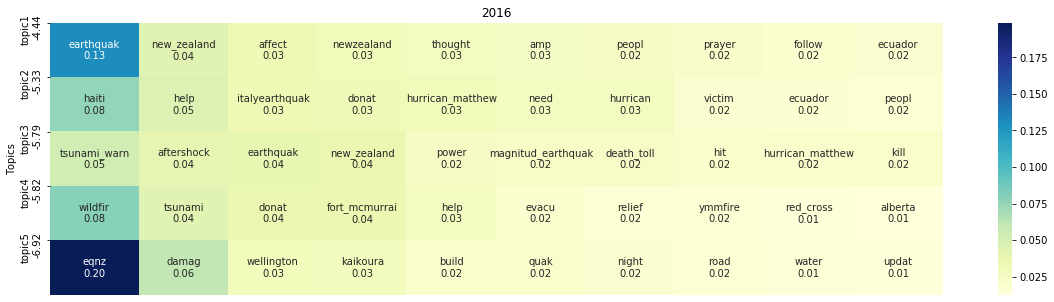

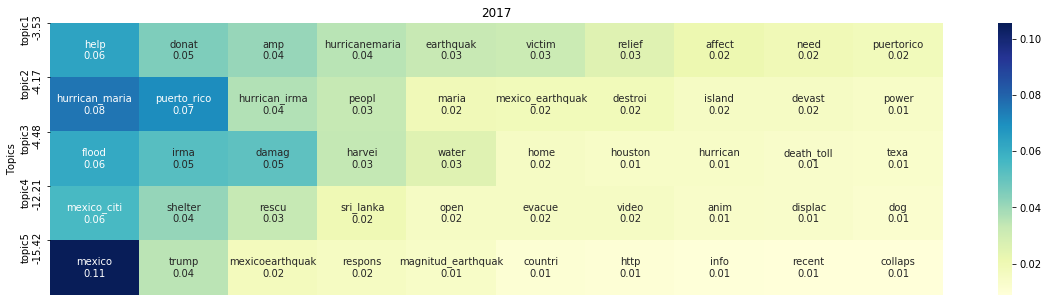

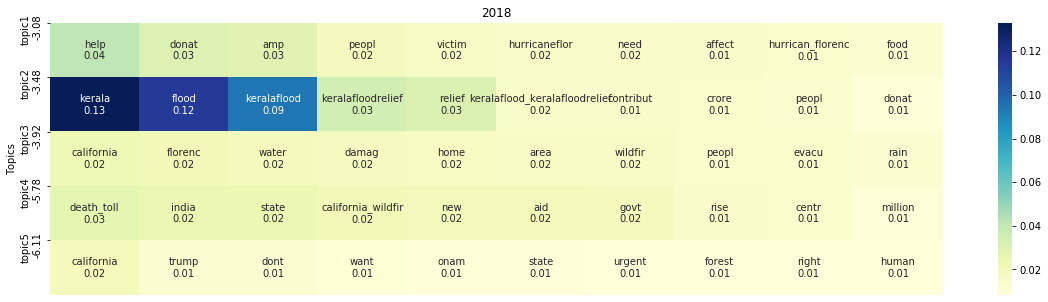

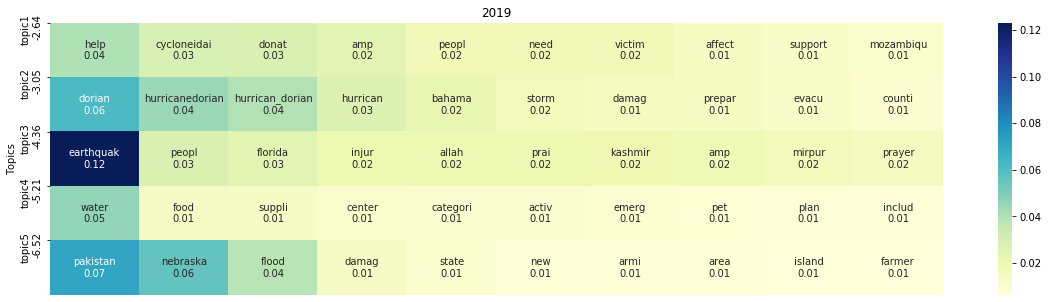

In [8]:
plot_topics_per_year(df, 5, 10)